# Enfermedades mentales en tecnología
## Facultad TIC Universidad Pontificia Bolivariana <a class="tocSkip">

**Estudiante:** Nathalia Andrea Ortega Gómez

**ID:** 000200550

**Email:** nathalia.ortega@upb.edu.co

**Fecha de Entrega: 22 de Octubre de 2020**

## Introducción

Cada año, [OSMI](https://osmihelp.org/) (open sourcing mental illness) realiza una encuesta a gran escala sobre la prevalencia y las actitudes hacia la salud mentall de las personas que trabajan en la industria tecnológica.

Las posibles salidas para la predicción son:
- Yes (tiene actualmente una enfermedad mental)
- No (No tiene una enfermedad mental)

## Objetivo principal
** Predecir qué empleados tienen más probabilidad de padecer una enfermedad mental. **

## Información de los datos
El dataset original contiene muchos datos faltantes, redundantes y ruidosos como es de esperarse en los datos del mundo real.

El dataset original, contenía como encabezados las preguntas de la encuesta, las cuales fueron transformadas a nombres más pequeños y discientes. A pesar de que, existen columnas con su mayoría de registros vacíos.

## dataset
Se unieron dos datsets de la misma encuesta ([las respuestas para el 2017](https://www.kaggle.com/osmihelp/osmi-mental-health-in-tech-survey-2017) y las [respuestas para el 2018](https://www.kaggle.com/osmihelp/osmi-mental-health-in-tech-survey-2018)) teniendo en cuenta que ambas contienen las mismas preguntas y que cada una cuenta con más de 500 registros.

# Importar librerías

In [1]:
pip install pandas


You should consider upgrading via the 'C:\Users\natya\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the 'C:\Users\natya\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: python-dateutil>=2.1 in c:\users\natya\appdata\local\programs\python\python38\lib\site-packages (from matplotlib) (2.8.1)

You should consider upgrading via the 'C:\Users\natya\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [4]:
pip install seaborn


You should consider upgrading via the 'C:\Users\natya\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.



In [5]:
pip install googletrans

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: chardet==3.* in c:\users\natya\appdata\local\programs\python\python38\lib\site-packages (from httpx==0.13.3->googletrans) (3.0.4)

You should consider upgrading via the 'C:\Users\natya\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import csv
from googletrans import Translator
%matplotlib inline

# Cargar los datos

In [7]:
data_raw = pd.read_csv("../data/raw/enfermedadesMentales2017-2018-clean-columns.csv")

In [8]:
translator = Translator()
original_questions_translate=[]
#tomar las preguntas originales de la encuesta
with open("../data/raw/enfermedadesMentales2017-2018.csv", 'r') as f:
    reader = csv.DictReader(f)
    original_questions = reader.fieldnames
#traducir las preguntas de la encuesta
for question in original_questions:
    original_questions_translate.append(translator.translate(question, dest='es').text) 

# Descripción y limpieza de los datos

In [9]:
print(len(original_questions_translate))

98


In [10]:
#Contar el porcentaje de registros faltantes en las diferentes columnas
original_questions_translate[0]='identificador único de la respuesta a la encuesta'
original_questions_translate[96]='Fecha de envío (UTC). Incluye la hora'
original_questions_translate[95]='Fecha de inicio (UTC). Incluye la hora'
data_missing=pd.DataFrame({'tipo':data_raw.dtypes,'descripcion':original_questions_translate, '% vacios':((data_raw.isna().sum()/1173)*100).values})

In [11]:
data_missing.style.background_gradient(cmap='Blues')

,tipo,descripcion,% vacios
#,object,identificador único de la respuesta a la encuesta,0.000000
independiente/emprendedor,int64,¿Trabaja por cuenta propia?,0.000000
No_empleados,object,¿Cuántos empleados tiene su empresa u organización?,14.407502
compania_tecnologia,float64,¿Su empleador es principalmente una empresa / organización de tecnología?,14.407502
cargo_tecnologia,float64,¿Su función principal dentro de su empresa está relacionada con la tecnología / TI?,14.407502
cubrimiento_EM,object,¿Su empleador proporciona beneficios de salud mental como parte de la cobertura de atención médica?,14.407502
concimiento_cubrimiento_EM,object,¿Conoce las opciones de atención de salud mental disponibles bajo la cobertura de salud proporcionada por su empleador?,23.273657
charla_EM,object,"¿Alguna vez su empleador ha discutido formalmente la salud mental (por ejemplo, como parte de una campaña de bienestar u otra comunicación oficial)?",14.407502
recursos_EM,object,¿Su empleador ofrece recursos para aprender más sobre los trastornos de salud mental y las opciones para buscar ayuda?,14.407502
anonimato_EM,object,¿Está protegido su anonimato si opta por aprovechar los recursos de tratamiento de salud mental o abuso de sustancias proporcionados por su empleador?,14.407502


In [12]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1173 entries, 0 to 1172
Data columns (total 98 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   #                                                           1173 non-null   object 
 1   independiente/emprendedor                                   1173 non-null   int64  
 2   No_empleados                                                1004 non-null   object 
 3   compania_tecnologia                                         1004 non-null   float64
 4   cargo_tecnologia                                            1004 non-null   float64
 5   cubrimiento_EM                                              1004 non-null   object 
 6   concimiento_cubrimiento_EM                                  900 non-null    object 
 7   charla_EM                                                   1004 non-null   object 
 8 

## Remover duplicados e información no necesaria

Verificar si hay identificadores de respuesta o identificadores de red repetidos

In [13]:
print(data_raw["#"].duplicated().sum())
print(data_raw["Network ID"].duplicated().sum())

0
90


Eliminar los duplicados de las fechas de incio y envío

In [14]:
data_raw.drop_duplicates(subset ="Network ID", keep = False, inplace = True)

Verificar si hay fechas de inicio o de envío repetidas. Debido a que estas contienen la hora con el formato HH:MM:ss, no debería existir ningún registro igual a otro

In [15]:
print(data_raw["Start Date (UTC)"].duplicated().sum())
print(data_raw["Submit Date (UTC)"].duplicated().sum())

1
0


Eliminar los duplicados de las fechas de incio y envío

In [16]:
data_raw.drop_duplicates(subset ="Start Date (UTC)", keep = False, inplace = True)

Eliminar la columna de identificador único de respuesta, identificador de red, las fecha de inicio y la fecha de envío

In [17]:
data_raw.drop(['#','Network ID','Start Date (UTC)','Submit Date (UTC)'],axis=1,inplace=True)

Verificamos que no existan duplicados luego de eliminar las columnas anteriores

In [18]:
print(f"Datos duplicados = {len(data_raw)-len(data_raw.drop_duplicates())}")

Datos duplicados = 0


#### Información de empleados de tecnología
La pregunta #4 es : ¿Su función principal dentro de su empresa está relacionada con la tecnología / TI? donde existen las respuestas 0 (No) y 1 (Si), dado que este analisis se enfoca unicamente en la salud mental de los empleados de la industría tecnológica, se eliminará los registros de esta columna con el valor 0 y nulos.

In [19]:
data_raw = data_raw[data_raw.cargo_tecnologia != 0.0]
data_raw = data_raw[data_raw.cargo_tecnologia.notna()]

Ahora, teniendo solo las personas que trabajan en cargos de tecnología, la columna cargo_tecnologia puede ser eliminada

In [20]:
data_raw.drop(['cargo_tecnologia'],axis=1,inplace=True)

#### Columnas de descripciones u opiniones
Estas columnas pieden anecdotas o descripciones de los casos y momentos vividos, para analizarlas se requiere hacer minería de texto, la cual no corresponde al caso. Por este motivo estas columnas son eliminadas.

In [21]:
data_raw.drop(['describir_conversacion_jefe','describir_conversacion_companeros','describir_conversacion_companeros_conmigo','empresa_anterior_describir_conversacion_jefe','empresa_anterior_describir_conversacion_companeros','empresa_anterior_describir_conversacion_companeros_conmigo','describir_no_apoyo_EM','describir_apoyo_industria_tecnologia_EM','otros_comentarios','describir_apoyo_EM','EM_afectado_carrera'],axis=1,inplace=True)

Eliminar la variable de `independiente/emprededor` debido a que solo tiene un valor (0: No)

In [22]:
data_raw.drop(['independiente/emprendedor'],axis=1,inplace=True)

### Columnas duplicadas 

Las respuestas a trastornos se almacenan en las columnas "trastorno_"+nombre del trastorno o sindrome, en el dataset se encuentran dos columnas llamadas iguales (ejemplo: "trastorno_personalidad" y "trastorno_personalidad.1" contienen los mismo valores). Por esto, las columnas cuyos nombres finalizan en ".1"

Lo mismo ocurre en las preguntas: "¿Ser identificado como una persona con un problema de salud mental ha afectado su carrera?" y "¿Cómo ha afectado a tu carrera?" las cualés recolectan la misma información y por tanto, una de ellas debe ser eliminada.

In [23]:
data_raw.drop(['trastorno_psicotico.1','trastorno_alimentacion.1','deficit_atencion.1','trastorno_personalidad.1','trastorno_obsesivo_compulsivo.1','trastorno_post_traumatico.1','sindrome_estres.1','trastorno_disasocion.1','trastorno_uso_sustancias.1','trastorno_adictivo.1','trastorno_ansiedad.1','trastorno_humor.1','Otro','Other.1'],axis=1,inplace=True)

Nuevamente, se revisa que no quedne valores duplicados

In [24]:
print(f"Datos duplicados = {len(data_raw)-len(data_raw.drop_duplicates())}")

Datos duplicados = 0


## Valores faltantes/vacíos/nulos

In [25]:
data_raw.sample(10).T

,23,461,40,1102,701,610,356,1022,127,945
No_empleados,1-5,26-100,100-500,6-25,6-25,1-5,6-25,More than 1000,More than 1000,More than 1000
compania_tecnologia,1,1,0,1,0,0,1,1,1,0
cubrimiento_EM,No,No,I don't know,Yes,Yes,I don't know,No,Yes,Yes,Yes
concimiento_cubrimiento_EM,NaN,No,No,Yes,No,No,NaN,Yes,Yes,Yes
charla_EM,No,Yes,No,No,Yes,No,No,I don't know,No,Yes
...,...,...,...,...,...,...,...,...,...,...
pais_vivienda,United Kingdom,United Kingdom,United States of America,United States of America,France,United States of America,New Zealand,United States of America,United States of America,United States of America
estado_US_vivienda,NaN,NaN,Virginia,Wisconsin,NaN,Virginia,NaN,North Carolina,North Carolina,Indiana
grupo_etnico,NaN,NaN,I prefer not to answer,White,NaN,White,NaN,White,White,White
pais_trabajo,United Kingdom,United Kingdom,United States of America,United States of America,France,United States of America,New Zealand,United States of America,United States of America,United States of America


In [26]:
for col in data_raw:
    print(f"{col} = {data_raw[col].unique()}")

No_empleados = ['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000']
compania_tecnologia = [1. 0.]
cubrimiento_EM = ["I don't know" 'Yes' 'No' 'Not eligible for coverage / NA']
concimiento_cubrimiento_EM = ['No' 'Yes' nan]
charla_EM = ["I don't know" 'No' 'Yes']
recursos_EM = ['No' "I don't know" 'Yes']
anonimato_EM = ['Yes' "I don't know" 'No']
dejar_trabajo_EM = ['Difficult' 'Very easy' 'Somewhat easy' "I don't know"
 'Neither easy nor difficult' 'Somewhat difficult']
hablar_salud_mentalYFisica = ['Same level of comfort for each' 'Physical health' 'Mental health']
hablar_jefe_EM = ['Yes' 'Maybe' 'No']
habla_jefe_EM_flag = [1. 0.]
hablar_EM_companeros = ['Maybe' 'Yes' 'No']
hablar_companeros_EM_flag = [1. 0.]
hablar_companeros_EM_conmigo = [ 0.  1. nan]
importacia_salud_fisica = [ 0.  7. 10.  9.  1.  5.  3.  8.  4.  2.  6.]
importancia_salud_mental = [ 1.  5. 10.  8.  7.  0.  3.  2.  9.  6.  4.]
trabajado_otras_empresa = [1 0]
empresa_anterior_tecnologia = [ 1. nan  0.]
empres

Puede evidenciarse que los alures nulos se identifican como NaN/nan, simplemente están vacíos. Por otro lado, en las columnas `cubrimiento_EM` y `empresa_anterior_cubrimiento_EM` existen respuestas como N/A:

- cubrimiento_EM : Not eligible for coverage / NA
- empresa_anterior_cubrimiento_EM: N/A (was not aware), N/A (none offered)

Sin embargo, estos valores no representan valores desconocidos o nulos, porque son especificados en los parentesis

### Retirando valores nulos
Se imprimen el procentaje de datos nulos o faltantes por columna, utilizando un mapa de calor, donde los colores oscuros representan las columnas con mayores porcentajes de valores faltantes o nulos

In [27]:
heatMap_data_missing=pd.DataFrame({'tipo':data_raw.dtypes, '% vacios':((data_raw.isna().sum()/1173)*100).values})
heatMap_data_missing.style.background_gradient(cmap='Reds')

,tipo,% vacios
No_empleados,object,0.000000
compania_tecnologia,float64,0.000000
cubrimiento_EM,object,0.000000
concimiento_cubrimiento_EM,object,7.502131
charla_EM,object,0.000000
recursos_EM,object,0.000000
anonimato_EM,object,0.000000
dejar_trabajo_EM,object,0.000000
hablar_salud_mentalYFisica,object,0.000000
hablar_jefe_EM,object,0.000000


Se puede evidenciar que todas las columnas que responden a preguntas sobre trastornos tienen más del 60% de datos faltantes o vacios y debido a que estas enfermedades son diagnosticadas para cada persona ([existen más de 18 tipos de enfermedades mentales](https://psicologiaymente.com/clinica/tipos-de-enfermedades-mentales)), por tanto no es posible llenar los valores faltantes, se decide eliminar dichas columnas

In [28]:
data_raw.drop(['trastorno_psicotico','trastorno_alimentacion','deficit_atencion','trastorno_personalidad','trastorno_obsesivo_compulsivo','trastorno_post_traumatico','sindrome_estres','trastorno_disasocion','trastorno_uso_sustancias','trastorno_adictivo','trastorno_ansiedad','trastorno_humor'],axis=1,inplace=True)

### Análisis columna género
En la variable de `genero` presenta 73 posibles respuestas

In [29]:
data_raw["genero"].nunique()

73

In [30]:
#Primero, se eliminan los valores de genero que son érroneos y los vacios
data_raw = data_raw[data_raw.genero != 'None']
data_raw = data_raw[data_raw.genero != 'God King of the Valajar']
data_raw = data_raw[data_raw.genero != 'She/her/they/them']
data_raw = data_raw[data_raw.genero != 'Contextual']
data_raw = data_raw[data_raw.genero != 'SWM']
data_raw = data_raw[data_raw.genero != '\\-']
data_raw = data_raw[data_raw.genero != 'Demiguy']
data_raw = data_raw[data_raw.genero != 'none']
data_raw = data_raw[data_raw.genero.notna()]

Luego, se procede a cambiar los nombres por 3 valores M (Masculino), F (Femenino)

In [31]:
gender_unique=data_raw["genero"].values
i=0
for gender in gender_unique:  
    if 'f' in gender or 'F' in gender:        
        gender_unique[i]='F' 
        
    elif 'm' in gender or 'M' in gender:
        gender_unique[i]='M'
    else:
        gender_unique[i]='NB' #Genero no-binario, otro, inconforme o no definido
    i=i+1
data_raw["genero"]=gender_unique

In [32]:
#Finalmente se obtienen 3 valores únicos en la variable Género
data_raw["genero"].nunique()

3

### Análisis variable objetivo
La variable objetivo aparece como `tiene_EM` y contiene 4 tipos de respuestas:

- Yes (tiene actualmente una enfermedad mental)
- No (No tiene una enfermedad mental)
- Don't Know (No sabe si tiene una enfermedad mental)
- Possibly (Es muy probable que si tenga una enfermedad mental pero no lo sabe con certeza)


<AxesSubplot:title={'center':'race distribution'}>

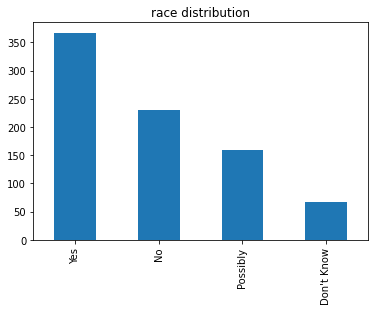

In [33]:
bar = data_raw["tiene_EM"].value_counts()
bar.plot.bar(title="race distribution")

Las respuestas Don't know y Possibly son confusas para el análisis de los resultados en la predicción, además son las que menos datos contienen, por esto se hacen los siguientes reemplazos en los valores:

- Possibly: se cambia por Yes
- Don't know se cambia por No

In [34]:
data_raw['tiene_EM'].replace('Possibly', 'Yes',inplace=True)
data_raw['tiene_EM'].replace("Don't Know", 'No',inplace=True)

<AxesSubplot:title={'center':'distribución enfermedad mental'}>

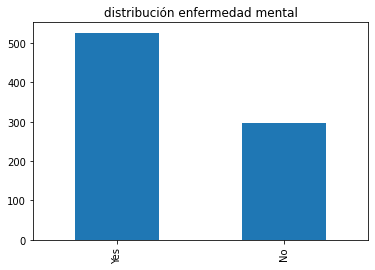

In [35]:
bar = data_raw["tiene_EM"].value_counts()
bar.plot.bar(title="distribución enfermedad mental")

### Imputación
La imputación se realiza cuando los datos nulos son menos del 30%, las que tengan un mayor porcentaje deben ser eliminadas porque en caso de hacer imputación generaría overfitting en el modelo

In [36]:
data_raw.drop(['EM_afecta_carrera','diagnostico_EM'],axis=1,inplace=True)

Usualmente, una muestra representativa tiene más de 30 datos y en el dataset más de 500 de las personas en la encuesta trabajan en Estados Unidos, por esto, los registros de países diferentes a Estados Unidos, Alemania y Reino Unido serán borrados y las columnas `estado_US_vivienda` y `estado_US_trabajo` se conservarán lleando sus datos nulos como "Otro"

In [37]:
data_raw = data_raw[data_raw.pais_trabajo.isin(['United States of America','United Kingdom','Germany'])]

In [38]:
#Imputación de las columnas de estado
data_raw['estado_US_vivienda'].fillna('Other', inplace=True)
data_raw['estado_US_trabajo'].fillna('Other', inplace=True)

In [39]:
#Se realiza la imputación en las variables categoricas con moda y en las numericas con moda, utilizando la función fillna
data_raw['concimiento_cubrimiento_EM'].fillna(data_raw['concimiento_cubrimiento_EM'].mode()[0], inplace=True)
data_raw['hablar_companeros_EM_conmigo'].fillna(data_raw['hablar_companeros_EM_conmigo'].mode()[0], inplace=True)
data_raw['empresa_anterior_tecnologia'].fillna(data_raw['empresa_anterior_tecnologia'].mode()[0], inplace=True)
data_raw['empresa_anterior_cargo_tecnologia'].fillna(data_raw['empresa_anterior_cargo_tecnologia'].mode()[0], inplace=True)
data_raw['empresa_anterior_cubrimiento_EM'].fillna(data_raw['empresa_anterior_cubrimiento_EM'].mode()[0], inplace=True)
data_raw['empresa_anterior_charla_EM'].fillna(data_raw['empresa_anterior_charla_EM'].mode()[0], inplace=True)
data_raw['empresa_anterior_recursos_EM'].fillna(data_raw['empresa_anterior_recursos_EM'].mode()[0], inplace=True)
data_raw['empresa_anterior_anonimato'].fillna(data_raw['empresa_anterior_anonimato'].mode()[0], inplace=True)
data_raw['empresa_anterior_hablar_salud_mentalYFisica'].fillna(data_raw['empresa_anterior_hablar_salud_mentalYFisica'].mode()[0], inplace=True)
data_raw['empresa_anterior_hablar_jefe_EM'].fillna(data_raw['empresa_anterior_hablar_jefe_EM'].mode()[0], inplace=True)
data_raw['empresa_anterior_hablar_jefe_EM_flag'].fillna(data_raw['empresa_anterior_hablar_jefe_EM_flag'].mode()[0], inplace=True)
data_raw['empresa_anterior_dispuesto_hablar_companeros_EM'].fillna(data_raw['empresa_anterior_dispuesto_hablar_companeros_EM'].mode()[0], inplace=True)
data_raw['empresa_anterior_hablar_companeros_conmigo'].fillna(data_raw['empresa_anterior_hablar_companeros_conmigo'].mode()[0], inplace=True)
data_raw['empresa_anterior_importancia_salud_fisica'].fillna(data_raw['empresa_anterior_importancia_salud_fisica'].mode()[0], inplace=True)
data_raw['empresa_anterior_importancia_salud_mental'].fillna(data_raw['empresa_anterior_importancia_salud_mental'].mode()[0], inplace=True)
data_raw['miedo_hablar_EM'].fillna(data_raw['miedo_hablar_EM'].mode()[0], inplace=True)
data_raw['grupo_etnico'].fillna(data_raw['grupo_etnico'].mode()[0], inplace=True)
data_raw['empresa_anterior_hablar_companeros_EM'].fillna(data_raw['empresa_anterior_hablar_companeros_EM'].mode()[0], inplace=True)

In [40]:
#Se reinician los indices, porque al eliminar filas y columnas los indices pueden moverse o cambiarse
data_raw.reset_index(inplace=True, drop=True)

In [41]:
# Valores faltantes en el dataset
print(f"Valores faltantes/vacios en el dataset = {data_raw.isnull().sum().sum()}")

Valores faltantes/vacios en el dataset = 0


## Outliers

In [42]:
#se describen estadisticamente las variables numéricas, verificando así que no existan outliers
data_raw.describe()

,compania_tecnologia,habla_jefe_EM_flag,hablar_companeros_EM_flag,hablar_companeros_EM_conmigo,importacia_salud_fisica,importancia_salud_mental,trabajado_otras_empresa,empresa_anterior_tecnologia,empresa_anterior_hablar_jefe_EM_flag,empresa_anterior_hablar_companeros_EM,empresa_anterior_hablar_companeros_conmigo,empresa_anterior_importancia_salud_fisica,empresa_anterior_importancia_salud_mental,tratamiento_EM,hablar_amigos_familia_EM,identificado_EM_trabajo,reaccion_companeros_EM,apoyo_industria_tecnologia_EM,dispuesto_contar_experiencia,edad
count,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000
mean,0.719880,0.335843,0.439759,0.481928,6.201807,4.837349,0.876506,0.713855,0.207831,0.296687,0.278614,5.423193,3.689759,0.667169,6.635542,0.120482,5.396084,2.543675,0.385542,35.331325
std,0.449396,0.472640,0.496732,0.500050,2.325334,2.445926,0.329251,0.452299,0.406061,0.457142,0.448655,2.304852,2.359184,0.471582,2.711297,0.325770,2.224514,0.893021,0.487090,8.158785
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,19.000000
25%,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2.000000,0.000000,5.000000,0.000000,4.000000,2.000000,0.000000,29.000000
50%,1.000000,0.000000,0.000000,0.000000,7.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,5.000000,4.000000,1.000000,7.000000,0.000000,5.000000,3.000000,0.000000,34.500000
75%,1.000000,1.000000,1.000000,1.000000,8.000000,7.000000,1.000000,1.000000,0.000000,1.000000,1.000000,7.000000,5.000000,1.000000,9.000000,0.000000,7.000000,3.000000,1.000000,40.000000
max,1.000000,1.000000,1.000000,1.000000,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,10.000000,1.000000,10.000000,1.000000,10.000000,5.000000,1.000000,66.000000


Analizando las descripciones estadisticas de las variables numéricas, se puede evidenciar que no existen outliers:
- En las variables binarias el valor minimo es 0 y el máximo es 1
- En las variables que incluyen una calificación (de 0 a 10) el valor minimo es efectivamente 0 y el máximo es 10
- En caso de la variable edad, el minimo es 19 y e maximo es 66, no existen registros de personas menores de edad o demasiado mayores

Sin embargo, la variable `apoyo_EM` contiene un dato atipico que debe ser eliminado

In [43]:
data_raw = data_raw[data_raw.apoyo_EM != 'I\'ve always been self-employed']

In [44]:
data_raw.shape

(663, 53)

In [45]:
data_raw.to_csv("../data/clean/enfermedadesMentales_clean.csv", index = False)

## Resultados de los datos limpios

** - Inicialemnte ** 1173 filas, 98 columnas

** - Después de la limpieza ** 663 filas, 53 columnas